In [2]:
import zipfile
z = zipfile.ZipFile("/content/Brain_Tumor_Segmentation_Datasets.zip")
z.extractall()

In [3]:
import os
import shutil

src = 'Brain_Tumor_Segmentation_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Brain_Tumor_Segmentation_Datasets' to 'datasets/Brain_Tumor_Segmentation_Datasets' successfully.


In [4]:
import yaml

# Define YAML configuration
data = {
    'path': 'datasets/Brain_Tumor_Segmentation_Datasets',
    'train': 'train/images',
    'val': 'valid/images',
    'nc': 1,
    'names': ['Tumor']
}

# Save to pothole.yaml
with open('Brain_Tumor_Segmentation_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Brain_Tumor_Segmentation_Datasets.yaml created successfully!")

Brain_Tumor_Segmentation_Datasets.yaml created successfully!


In [5]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 81.8 MB/s eta 0:00:00


In [6]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

from ultralytics import YOLO

# Load a smaller pretrained YOLOv8 nano segmentation model (better for limited GPU memory)
model = YOLO('yolov9e-seg.pt')

# Train the model with data augmentation (further reduced for GPU memory)
model.train(
    data='Brain_Tumor_Segmentation_Datasets.yaml',
    epochs=10,
    imgsz=416,  # Further reduced to 416
    batch=2,    # Further reduced to 2
    name='Brain_Tumor_Segmentation_Datasets_yolov8',
    save=True,
    save_period=-1,
    patience=20,
    val=True,
    augment=True,  # Enables default augmentations
    degrees=10.0,  # Rotation
    translate=0.1,  # Translation
    scale=0.5,  # Scaling
    shear=2.0,  # Shearing
    perspective=0.0005,  # Perspective
    flipud=0.3,  # Vertical flip probability
    fliplr=0.5,  # Horizontal flip probability
    hsv_h=0.015,  # Hue augmentation
    hsv_s=0.7,    # Saturation
    hsv_v=0.4     # Value
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=True, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Brain_Tumor_Segmentation_Datasets.yaml, degrees=10.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.3, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1971894a10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [7]:
import numpy as np

def draw_segmentation(image, mask, class_colors):

    # Define transparency level (0 to 1)
    alpha = 0.2  # 50% transparency

    # Create a colored overlay of the same shape as the image
    overlay = np.zeros_like(image, dtype=np.uint8)

    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue  # Skip background class
        class_mask = (mask == class_id)
        color = class_colors[class_id]
        for c in range(3):
            overlay[..., c][class_mask] = color[c]

    # ✅ Fixed: Convert PIL image to NumPy before resizing
    image = np.array(image)  # Convert PIL to NumPy

    # Create a copy to preserve original image
    blended_image = image.copy()

    # Blend for all class masks
    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue
        class_mask = (mask == class_id)
        for c in range(3):  # For each color channel
            blended_image[..., c][class_mask] = (
                image[..., c][class_mask] * (1 - alpha) +
                overlay[..., c][class_mask] * alpha
            ).astype(np.uint8)

    return blended_image


image 1/1 /content/datasets/Brain_Tumor_Segmentation_Datasets/test/images/Y194_jpg.rf.90538abec55aa779eb0accdc75e368d4.jpg: 416x416 1 Tumor, 123.0ms
Speed: 7.2ms preprocess, 123.0ms inference, 29.3ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/datasets/Brain_Tumor_Segmentation_Datasets/test/images/Y184_JPG.rf.8a5a5d38fb70feefa3303cce6a01c7e7.jpg: 416x416 1 Tumor, 83.7ms
Speed: 6.0ms preprocess, 83.7ms inference, 6.9ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/datasets/Brain_Tumor_Segmentation_Datasets/test/images/Y46_jpg.rf.19aee0544e1e57e47f214c05ae12bff9.jpg: 416x416 1 Tumor, 64.4ms
Speed: 4.4ms preprocess, 64.4ms inference, 4.8ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/datasets/Brain_Tumor_Segmentation_Datasets/test/images/Y91_jpg.rf.fbc6e7b59858457b81c78c17b52eb4c9.jpg: 416x416 1 Tumor, 61.7ms
Speed: 5.2ms preprocess, 61.7ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /con

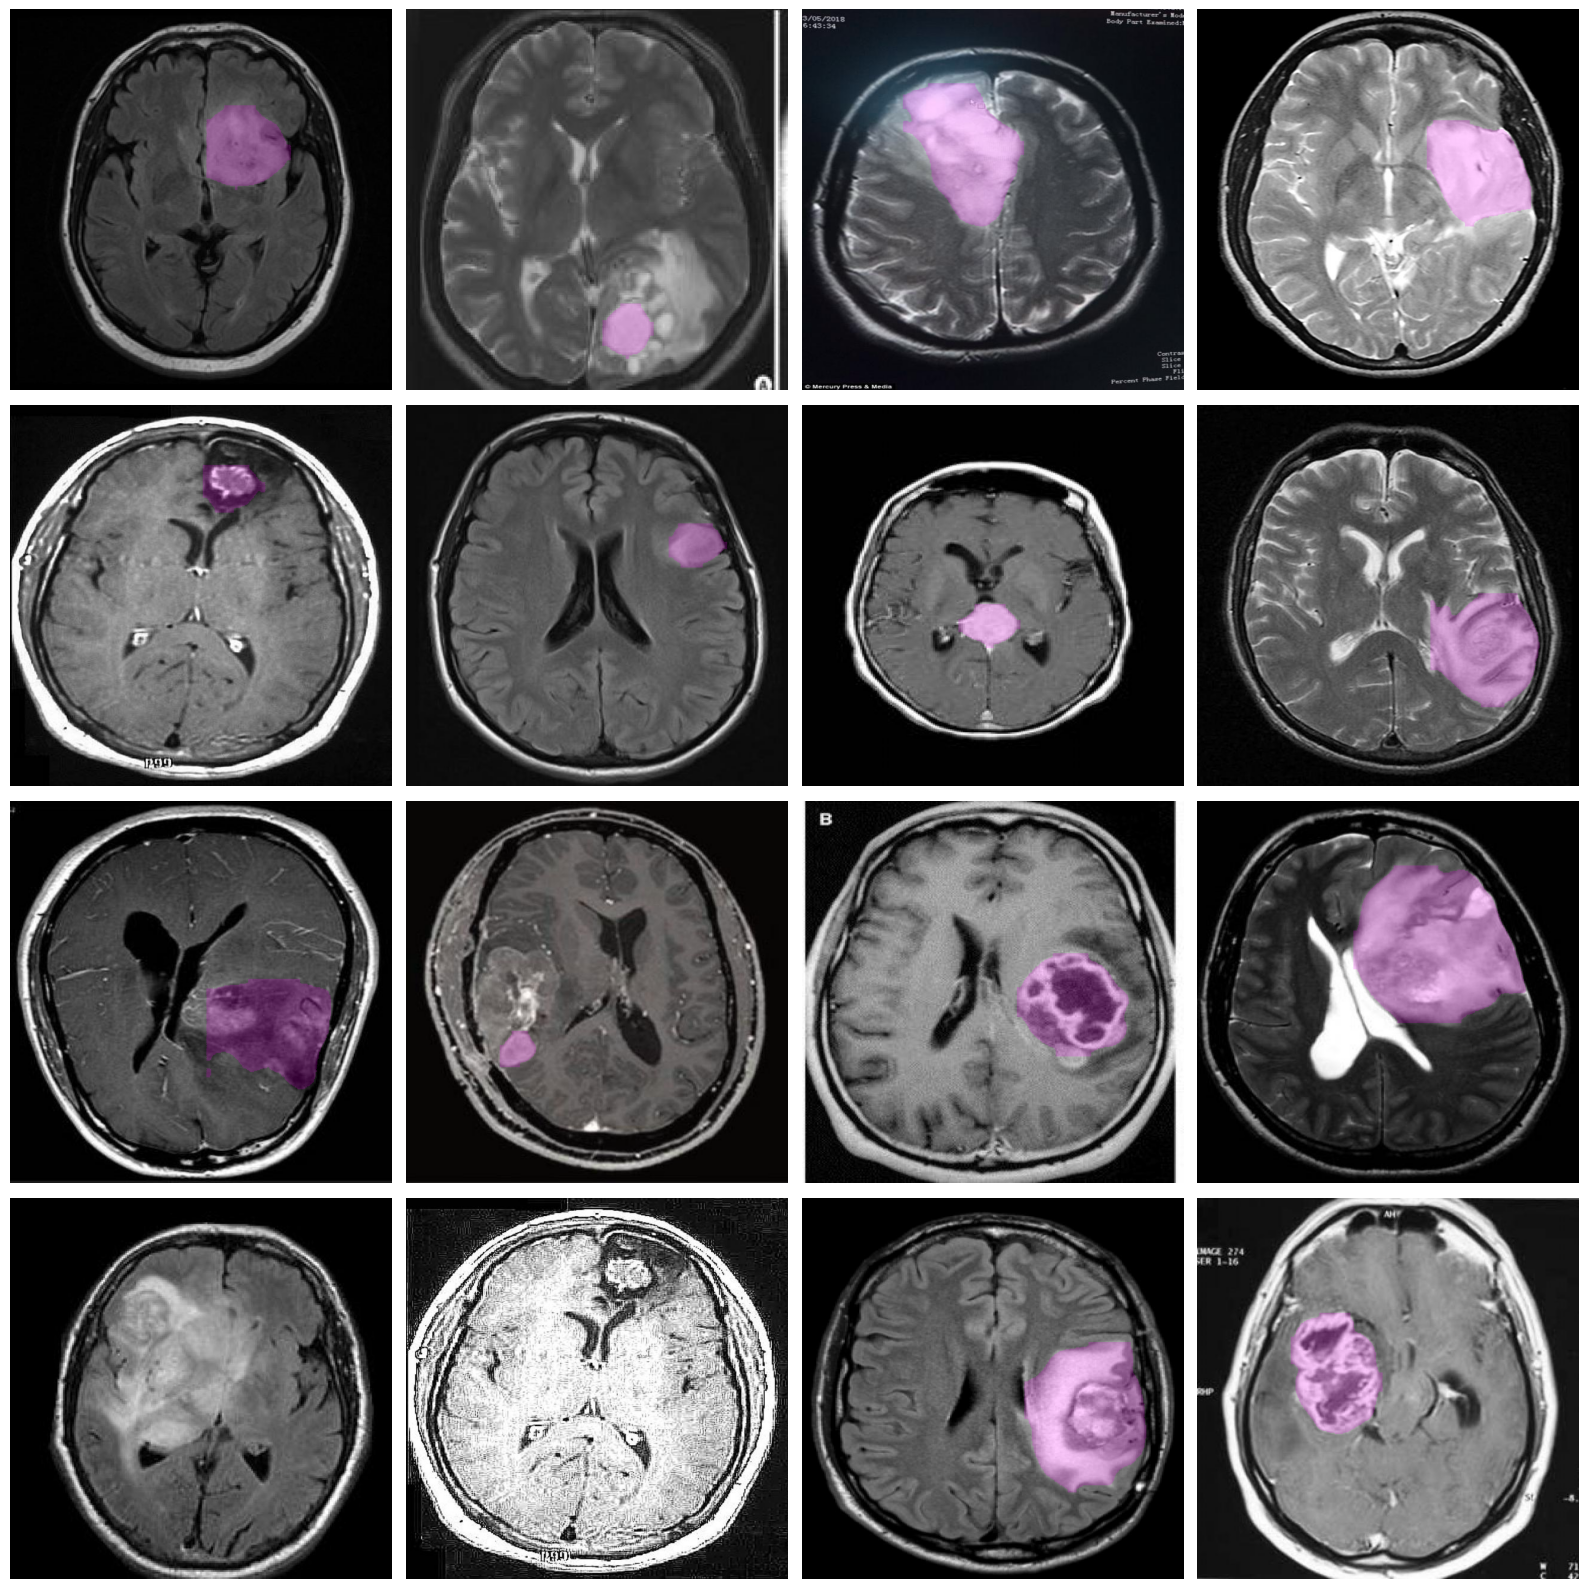

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/segment/Brain_Tumor_Segmentation_Datasets_yolov8/weights/best.pt')

# Test images directory
test_images_dir = 'datasets/Brain_Tumor_Segmentation_Datasets/test/images'

# Define colors for visualization
color_sample = {
    0 : (0, 0, 0),
    1 : (255, 0, 255),      # Green
}

image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)
    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_path)[0]
    # print(results)

    if results.masks:
      # Draw segmentation masks
      for seg in results.masks.data:
          mask = seg.cpu().numpy()
          # Resize mask to match image dimensions
          mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))
          image = draw_segmentation(image_rgb, mask_resized, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    ax[idx].imshow(image_rgb)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
